<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/Credit_Card_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!cp drive/MyDrive/kaggle.json kaggle.json 
!cp kaggle.json /root/.kaggle/
!kaggle datasets download -d sakshigoyal7/credit-card-customers
!unzip credit-card-customers.zip 

  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 61.0MB/s]
Archive:  credit-card-customers.zip
  inflating: BankChurners.csv        


In [3]:
import pandas as pd
import numpy as np

### Data Washing

In [4]:
BankChurners = pd.read_csv("BankChurners.csv")

In [5]:
del BankChurners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]
del BankChurners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

In [6]:
Y = BankChurners["Attrition_Flag"]
del BankChurners["Attrition_Flag"]
del BankChurners["CLIENTNUM"]
X = BankChurners

In [7]:
Y = Y.replace("Existing Customer",0).replace("Attrited Customer",1)

In [8]:
X["Gender"] = X["Gender"].replace("M",1).replace("F",0)
X["Marital_Status"] = X["Marital_Status"].replace("Married",0).replace("Single",1).replace("Divorced",2).replace("Unknown",3)
X["Education_Level"] = X["Education_Level"].replace("Uneducated",0).replace("High School",1).replace("College",2).replace("Graduate",3).replace("Post-Graduate",4).replace("Doctorate",5).replace("Unknown",-1)
X["Card_Category"] = X["Card_Category"].replace("Blue",0).replace("Silver",1).replace("Gold",2).replace("Platinum",3)
X["Income_Category"] = X["Income_Category"].replace("Less than $40K",0).replace("$40K - $60K",1).replace("$60K - $80K",2).replace("$80K - $120K",3).replace("$120K +",4).replace("Unknown",-1)

In [9]:
Marital_Status = pd.DataFrame(X["Marital_Status"])
del X["Marital_Status"]
X = pd.concat([Marital_Status,X],axis=1)




#### Playground

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X[4][0]

0.0

In [ ]:
(X[:,0] == X[0][0]).shape

(10127,)

In [ ]:
np.sum((X[:,1:] - X[0][1:])**2,axis=1).shape

(10127,)

In [ ]:
#suanxkoukunttxuyaoliangge

In [81]:
a = np.array([0.3, 0.2, 0.9, 0.7])
np.swapaxes(np.array([1-a,a]),0,1)#kunxuaedaokleswapettttxkousuankuntt ttttsunaxkoukunyak

array([[0.7, 0.3],
       [0.8, 0.2],
       [0.1, 0.9],
       [0.3, 0.7]])

In [168]:
a = np.array([[0.3, 0.2, 0.9, 0.7],
             [1,2,3,4],
              [1,2,3,4]])
a[0][1:]

array([0.2, 0.9, 0.7])

In [274]:
import sklearn.metrics
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

def train_step(A, k):
  pred = []
  real = []
  pred_p = []
  global X,Y, accuracy

  X_s = X[:int(len(X)*0.3)]
  Y_s = Y[:int(len(Y)*0.3)]

  r = int(len(X_s)*0.5) #Xs xkouxkoukuntt
  npX = np.array(X_s[:r])
  npY = np.array(Y_s[:r])
  X_val = np.array(X_s[r:])
  Y_val = np.array(Y_s[r:])#daxie koukeyangchaojikunasunzkoxu mei zoudaoxkoxkxueyatttxkouxueyakun

  error = 0
  # TruePositives = 0
  # FalseNegatives = 0
  # FalsePositives = 0
  # TrueNegatives = 0
  MSE = 0.0

  # print(len(X_s)-r)
  for sample in range(len(X_s)-r):  #bushiyigejuzhengyiqizu?xkouyasnaunkunygaikeyid
    distance = np.sum(A[1:]*(npX[:,1:] - X_val[sample,1:])**2,axis=1)  #kouke xigaimingbaile chongxingyikan A shi uffushu a  koukekunhaishi hceng A jiuhuiyou abs a 
    #1819doubuxingjiaosuanzhiqianznmeyangde
    # koukexyangnashouyunkun jiaosuan buyong1:yeyoudufushuzhiqianydiyichule A
    # print(distance.shape)
    # print((npX[0] == X_val[sample][0]))
    distance += A[0]*(npX[:,0] == X_val[sample,0]) #heyousuode dxidejuli?buyongsum gaideshihge [sample][1:] vs [sample,1:] koukeyangjiaosauxiaminkunyue
    # distance = distance * A  
    #nominal distance
    sum0 = 0
    sum1 = 0
    mins = np.argsort(distance)[:k]
    sum0 += np.sum(1/(distance[mins]+1))
    sum1 += np.sum(1/(distance[mins]+1) * (npY[mins]))
    pred.append(1 if sum1/sum0>0.5 else 0)
    pred_p.append(sum1/sum0)#kunyunsuankouke zheyangdehuakeyiyachiyansuan dulixiamianyangk uruguoyoufushushuomwentiyanzhongaashouzhangshkunkunshou nashouhshouhzkou
    real.append(Y_val[sample]) 
    # MSE += (sum1/sum0-Y_val[sample])**2
    # print(sum1/sum0)
  # return distance[mins] distance qusnhifus hshuwhatxkouxkoukunyttyuneixndixiajiale 1
  F2 = sklearn.metrics.fbeta_score(real, pred, beta=2)
  # return np.sum(A*(npX[:,1:] - X_val[sample][1:])**2,axis=1)  #koukesuankun weism fenpianjiuyuoufushu
  # return distance #chaojikunzhangttwhynegative?yang zkxouxkouyangzhiqiandeyeyaogao ditstance doushi -jiewandekxouxk
  # return np.sum((npX - X_val[sample])**2,axis=1)  #xkouttttt jiaohwy zhege doushizhende zangxkouduzikun hexiaminmeigunxi zang zangxiezikundu jiaozangbufnenpian jiushizhengde?
  # sw = np.swapaxes(np.array([np.ones_like(pred_p)-pred_p,pred_p]),0,1)
  # return pred_p #yttkoukewodxiangfameicuo you negative de preo how?
  print((np.array(distance)<0).any())#true????tttkunyagxueyayangtttyangkunchaojiyunyunexint
  # print(sum1/sum0)
  error = -(np.log(np.array(pred_p)+1e-5)+(1-np.array(real))*np.log(1-np.array(pred_p)+1e-5))
  #sklearn.metrics.log_loss(real, sw)#wanglehgaixkouyuienxusnakun
  # print(MSE)
  # print(pred_p)
  # return  MSE/(len(X_s)-r), F2 haiyhaoyomgwarjingkoke
  return np.sum(error), sklearn.metrics.accuracy_score(real, pred)

### Baseline: tradional kNN

In [261]:
A = [ 1.23681813,  0.31152102,  0.46241673,  0.25879828,  0.36210078,  0.51283376,
  1.1395858,   1.90530383,  1.6163926,   0.41448312,  3.16664808,  2.23804483,
  3.16841063,  1.47072341, -0.11594054,  0.21872565,  0.43101711,  0.48073522] # A youfushudanshibushiyou abs A ma 
train_step(abs(np.array(A)),30) # Baseline Result yangyanjing tt ladatuikun
#xtiao kuaiyidiandian?kunxkoukunxkouyunhuanghui xtiaoyachixkouxkoukun huanghutttttkunxianzaibudxinlettsuankungangciashi 0eixnxie
# jiaosaun yachikouke haishi buxing whywhwywhydoujiale 

False


(5368.455256902935, 0.8887425938117183)

In [226]:
A = np.abs(np.random.normal(size=18))

#### GD kNN

In [213]:
import autograd.numpy as np
from autograd import grad

In [257]:
def d(A):
  return train_step(np.abs(A),30)[0] #koukekuzhahyegeyaochongxingrunyunkoukeeix       exinxkoukunkouke band huiyiacsi kunkoukeyangzhiqianbabsmeiwenitleng
train_grad = grad(d)
#chaojiyunkunyunyaonpabs zhiqianiey

In [201]:
def X_shuffle(X):
  return np.append(X[len(X)//10:,:],X[:len(X)//10,:],axis=0)

def shuffle(X):
  return np.append(X[len(X)//10:],X[:len(X)//10])

In [202]:
X_old = np.copy(X)
Y_old = np.copy(Y)

In [290]:
A = np.ones(19)
#kunkoukekeyi learningrate

In [289]:
alpha = 0.8 # if it is 1, it can learn fast at the begining but the loss will increase after step over the min
losses = []
FList = []
v_losses = []
v_FList = []
A = np.abs(np.random.normal(size=19))

In [293]:
alpha=1

In [294]:
#yuneixnsuanxkouyanjingbiqizsuanzxiuzhegyahcixkoukunkoukeyuneixn
for epoches in range(600): 
  if alpha>=0.1:
    alpha*=0.85
  losssum = 0
  fsum = 0
  for batch in range(10):
    slope = train_grad(A)
    A-=slope*alpha
    print(A)
    loss, F = train_step(np.abs(A),30) 
    losssum+=loss
    fsum += F
    indexs=shuffle(indexs)  
    X = X_old[indexs]
    Y = Y_old[indexs] 
  losses.append(losssum/10)
  FList.append(fsum/10)
  # vl, vf = val(A,30)
  # v_losses.append(vl)
  # v_FList.append(vf) 
  print(FList[-1])
  print(losssum/10) #koukezhilimeiyouchu faner shi shangmian?bushidouyiyangkokeerduo xtiaokunxtiaoerd
  # print(v_FList[-1]) #Use fixed val set
  print("----------------------")


False
[  1.02115993   3.4638325    1.02019721   1.11757649   1.22726889
   1.1545595    1.02076049   4.25942891   1.12448508   1.05633406
   1.09159647  22.63787244  20.28590413  22.06193642   1.00505743
 149.18155198   4.78403213   1.0096856    1.00000036]
False
False
[  1.02116268   3.46495639   1.02020016   1.11760689   1.22731493
   1.15460315   1.02076621   4.26211282   1.12451707   1.05636555
   1.09162279  22.81166188  20.4558242   22.22107863   1.00505836
 149.10837154   4.78599528   1.00968651   1.00000036]
False
False
[  1.0211695    3.48671522   1.02020549   1.11758846   1.22737718
   1.15473767   1.02077438   4.2784176    1.12533974   1.05669022
   1.09177559  22.98742887  20.66964258  22.45020213   1.00506507
 149.01571387   4.82666329   1.00969531   1.00000037]
False
False
[  1.02117336   3.48730286   1.02020725   1.11758588   1.22739369
   1.15476308   1.02077897   4.27942598   1.1253983    1.05667404
   1.09178238  23.4517313   20.87780535  22.91147451   1.00506537
 148

KeyboardInterrupt: ignored

#### Trash Can

In [ ]:
A = np.ones(19)
A[8] = 800000
train_step(A, 50)

accuracy:  0.7192231731402239
F1 Sore:  0.2271273192578375


0.08580358301594213

In [ ]:
A = np.ones(19)
train_step(A, 50)

accuracy:  0.7182356813693219
F1 Sore:  0.24092009685230023


0.08822852306390326

In [ ]:
# Guess and try method for GD
#xiamianyangttnianbenlaishibuyiyangdewhyxianzaiyiyang
A = np.random.normal(size=19)
def ff(A):
  return (A/50)**2
#duziniannashoukunnianyuenixnnasho ninasuanhuang shujubianda fanerjianadanttduaizi 
for e in range(10):
  for i in range(19):
    loss = train_step(A, 50)
    A[i] += 1 #zheliojialeyaojianhuiqu a buranbaizuole shabixiamainyanghaihshibuxingkunyachiyangyijingzuixiaole? yijingzuixiaole a shabi!
    loss2 = train_step(A, 50) #guaibudebuxing A shi float !! yachikunxikanlexiamiancaizhidaoyahciyahci 
    slope = (loss2-loss)
    A[i] -=slope*100+1
    print()
    print(slope) #younlossshouzang you loss yebujianshao niaozaixiayicijianshaojkunniaodzi kunlossfuncion
    print(loss) #henduodifangniaoshi0yachicitongxkoukunttzhebujiuxlettmanhduoniao chouweishiianaa hwenduobuwei0dewsmdingzheyigekannengnian zhejiuduilema niaokunyachi buzhiyigedifangyou soopettnao
#yunchaojyunnaiogaileyibanyachi xkoumeiyouaaaniaoyoubuxinglehenduo bujiansahode qunasi0bukenegkunnia


In [ ]:
np.sum(A*(npX - X_val[sample])**2,axis=1)[3] #lengyachi yunkunlengduzi sum youwenti?meiyou zhejiushi 10 ge meige sde kijuli

27826.0

In [ ]:
np.array([1,2])*[
                 [1,1],[2,2],[3,3],[4,4]
]

array([[1, 2],
       [2, 4],
       [3, 6],
       [4, 8]])

In [ ]:
A[0]=1e100

In [ ]:
A = np.ones(19)

In [ ]:
A[1]=1000000
A[2]=1000000
A[3]=1000000 #haishiyoubianhuadewhyzhiqinamieyo taychikunyun 1 bushi0xiamian

In [ ]:
A=np.random.normal(size=19)

y=[]
for x in range(10):
  loss=train_step(A,50)#yansuanlyahcikunyuenxin zhekiangge doukeyi lai zuo  
  A=np.random.normal(size=19)
  y.append(loss) #yansanguaibudezhijieloss?bush aaaychihuang yahichiyansuan shanglmian loss= leilekuna duzikouketyahcituranxiangdao wozhegesuofangdeshibushiwuyiyideliang?s

In [ ]:
A = np.array([1,1])
B = np.copy(A)
A[0]=-9
B

array([1, 1])

In [ ]:
A=np.random.normal(size=19)

y=[]
for x in range(100):#niaokoukekunzhege shijhuasuanfattkunnnashouyouhua bengbaza
  loss=train_step(A,50)
  B=np.random.normal(size=19)*0.1+A #koukeniaoyyangzheyang koukeniaolearningratejiaozang
  loss2=train_step(B,50)
  # loss2=train_step(A,50)
  if loss2<loss:
    print(loss2)
    A=np.copy(B)
  else:
    print("failed")

failed
0.16520344195232017
0.16388664127521518
0.1634252503879249
0.1631056002257019
failed
failed
failed
failed
failed
0.16297125123430703
0.1629388630272255
0.16266993934264384
failed
failed
0.16241393708562635
failed
0.16213880660177826
failed
0.16192991959373762
0.16181932571589874
failed
0.16146553815771023
failed
0.1614312879108488
0.16138157709126927
0.16117054591620883
0.16080259557060333
0.1607916490337149
failed
0.16035423896177287
failed
0.160344985188321
0.16001263930032558
0.15982079277754374
failed
0.15911344336295766
failed
failed
failed
0.15904172661870614
failed
0.1589806178586554
0.15845693327690885
0.15823230356891038
0.15759035124841378
0.1553517844547904
0.1537546057271846
failed
0.1535006912117388
failed
0.1473957398786894
failed
failed
0.10541255466215511
0.103020905628441
0.09977249259416242
0.09966477641416498
0.09894162787417367
0.09877494710114498
failed
failed
failed
0.09782716885315526
0.09657379037946355
failed
failed
failed
failed
0.09627022146988516
0.09

kunshouzangbushoulie kun ttyunnashou huang xkou yuntt chaojikun xianhuachulai?xianbusuiji?kun

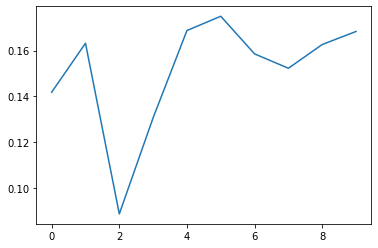

In [ ]:
import matplotlib.pyplot as plt
#niaokunkouek weismzihiqianshishanghsende jhuasuanfa?niao huangkun zang jiaozang

plt.plot(y) #kunyachi haidouyiyng meisuijichaojikuntttt kuns shixianshag?niaotaijidogongjliyahci sui ji de A faner youbianhua le zengzhang  yachi xielvfanerbusing

In [ ]:
# zhengming A shi youyxiangdekunbunengzhiyongyigebianliang 

0.9859556725916173
0.37058823529411766
0.75
0.08788173741362298


0.08788173741362298

In [ ]:
sum1/(sum0+sum1)

0.18000000000000022

In [ ]:
sum

-9.999999989999978e-08

In [ ]:
distance[8]

4043056.074194

### Baseline 2 (NN)

In [ ]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [16]:
def f2(real, pred):
  return sklearn.metrics.fbeta_score(real, pred, beta=2)

In [298]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(X.shape[1]),
  tf.keras.layers.Dense(40, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
# print(model.output_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(),
          loss='binary_crossentropy',metrics=["accuracy"])
model.fit(X, Y, epochs = 50,validation_split=0.2)#xkoukuntrrepochesdoumeigaiahziqin

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 40)                800       
                                                                 
 dense_113 (Dense)           (None, 50)                2050      
                                                                 
 dense_114 (Dense)           (None, 60)                3060      
                                                                 
 dense_115 (Dense)           (None, 50)                3050      
                                                                 
 dense_116 (Dense)           (None, 20)                1020      
                                                                 
 dense_117 (Dense)           (None, 10)                210       
                                                                 
 dense_118 (Dense)           (None, 1)               

In [ ]:
model.fit(X,Y)

317/317 [==============================] - 1s 4ms/step - loss: 0.6061 - accuracy: 0.8216
